In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./danawa_crawling_result.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙목록,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...",47510
1,LG전자 오브제컬렉션 코드제로 A9S AU9982,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,1019160
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",38990
3,LG전자 오브제컬렉션 코드제로 A9S AU9882,핸디스틱청소기 / 무선형 / 흡입+물걸레겸용 / 흡입력: 220W / [구성] 와이...,894400
4,삼성전자 비스포크 제트 VS20A956A3,핸디스틱청소기 / 무선형 / 흡입전용 / 흡입력: 210W / [구성] 바닥 / 솔...,492190


# 1. 회사명 모델명 분리

In [5]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [7]:
product_list

['차량용 청소기 A3 (해외구매)',
 '오브제컬렉션 코드제로 A9S AU9982',
 '미지아 차량용 핸디 무선 청소기 (해외구매)',
 '오브제컬렉션 코드제로 A9S AU9882',
 '비스포크 제트 VS20A956A3',
 '아이클린 무선 미니 핸디 청소기',
 '코드제로 A9S AT9271',
 '에르고라피도 ZB3512IG',
 '비스포크 제트 VS20B956D5',
 '오브제컬렉션 코드제로 A9S AO9571',
 '드리미 V11',
 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)',
 '제트 VS20T92K3QD',
 '미지아 차량용 핸디 무선 청소기 SSXCQ01XY',
 '비스포크 제트 VS20B956AX',
 '비스포크 제트 VS20A957D2',
 '비스포크 제트 VS20A956AVW',
 '코드제로 A9S AS9200BA',
 'V10 앱솔루트',
 '오브제컬렉션 코드제로 A9S AU9802WD',
 '비스포크 제트 VS20B957E5',
 'NEW i20',
 '차량용 듀얼 무선 에어건 청소기 JVC-3000',
 '코드제로 A9S AS9271',
 'DCPW550B',
 'MORUN 차량용 무선 진공 청소기 V6',
 '코드제로 A9S AT9200BA',
 '듀스핀3 PRO',
 'V12 디텍트 슬림 컴플리트',
 '제트 VS15R8577Q5CW',
 'i30 아이타워',
 '제트 VS20T92K0BF',
 '미지아 K10',
 '오브제컬렉션 코드제로 A9S AU9602WD',
 '무선 미니 청소기 imini',
 '오브제컬렉션 코드제로 A9S AU9872MPD',
 'V10 플러피 오리진',
 '옴니 글라이드 컴플리트',
 '듀스핀5 PRO',
 '파워스틱 VS02R6512JG',
 '드리미 V10',
 'V11 앱솔루트',
 '무선 에어건 차량용 청소기 EM-AG2030',
 '코드제로 A9S AT9270',
 'WELL Q6 WQ61-1EDB',
 '퓨어 Q9 파워프로 PQ92-3OBF',
 '클린듀얼 차량용 청

# 2.스펙목록에서 카테고리 사용시간 흡입력 추출

In [9]:
spec_list = data['스펙목록'][0].split(' / ')
spec_list

['차량용청소기',
 '무선',
 '흡입력: 15,000Pa',
 '최대출력: 135W',
 '헤파필터',
 '추가노즐: 틈새, 솔브러쉬',
 'LED라이트',
 '사용시간: 45분',
 '배터리 잔량표시',
 '소음: 75dB',
 '충전방식: USB C타입',
 '충전시간: 3~5시간',
 '색상: 블랙, 실버',
 '크기: 296x56.5mm']

In [10]:
# 카테고리 정보 추출
category = spec_list[0]
category

'차량용청소기'

In [12]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
print(use_time_spec)
print(suction_spec)

사용시간: 45분
흡입력: 15,000Pa


In [13]:
use_time_value = use_time_spec.split(' ')[1].strip()
use_time_value

'45분'

In [14]:
suction_value = suction_spec.split(' ')[1].strip()
suction_value

'15,000Pa'

In [15]:
# 카테고리, 사용시간, 흡입력
category_list =[]
use_time_list =[]
suction_list = []
for spec_data in data['스펙목록']:
    spec_list = spec_data.split(' / ')
    category = spec_list[0]
    category_list.append(category)
    # 사용시간/흡입력
    use_time_value = None
    suction_value = None
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_value = spec.split(' ')[1].strip()
        elif '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [26]:
print('카테고리: ', len(category_list), category_list[0:5])
print('사용시간: ', len(use_time_list), use_time_list[0:5])
print('흡입력: ', len(suction_list), suction_list[0:5])

카테고리:  400 ['차량용청소기', '핸디스틱청소기', '차량용청소기', '핸디스틱청소기', '핸디스틱청소기']
사용시간:  400 ['45분', '1시간', '9~30분', '1시간', '1시간']
흡입력:  400 ['15,000Pa', '220W', '13,000Pa', '220W', '210W']


# 3.무선청소기 사용시간 통일

In [17]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0] # 1시간 20분 = 1
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0] # 1시간 20분 = 1
            else:
                minute = 0    # 1시간
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour) * 60 + int(minute)
    except:
        return None

In [20]:
#동작 테스트
times = ['45분', '1시간', '9~30분', '1시간', '1시간', '3시간30분', '2시간', '8분']
for time in times:
    time_value = convert_time_minute(time)
    print(time, ' = ', time_value)

45분  =  45
1시간  =  60
9~30분  =  None
1시간  =  60
1시간  =  60
3시간30분  =  210
2시간  =  120
8분  =  8


In [21]:
new_use_time_list =[]
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
print(len(new_use_time_list))
print(new_use_time_list[:10])

400
[45, 60, None, 60, 60, 45, 60, 35, 60, 60]


# 4.무선 청소기 흡입력 단위 통일

In [29]:
# w 지우고 pa는 100으로 나눠서 단위를 통일
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or "W" in value:
            result = value.replace('A', '').replace("W", "")
            result = int(result.replace(',', ''))
        elif 'PA' in value:
            result = value.replace('PA', "")
            result = int(int(result.replace(',', '')) /100)
        else :
            result= None
        return result
    except:
        return None

In [30]:
# 흡입력 함수 동작 테스트
suc = ['15,000Pa', '220W', '13,000Pa', '220W', '210W']
for su in suc:
    suc_va = get_suction(su)
    print(suc_va)

150
220
130
220
210


In [32]:
new_suction_list=[]
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
print(len(new_suction_list))
print(new_suction_list[:10])

400
[150, 220, 130, 220, 210, 100, 210, None, 220, 210]


# 5. 전처리 결과를 엑셀로 저장

In [33]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),47510,45.0,150.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),38990,NaN,130.0
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210.0


In [34]:
pd_data.to_csv('result_preprocessing.csv', index=False)

In [35]:
pd_data['카테고리'].value_counts()

핸디스틱청소기             214
차량용청소기               92
핸디청소기                39
물걸레청소기               30
욕실청소기                 8
업소용청소기                6
스틱청소기                 4
핸디/스틱청소기+로봇청소기세트      4
침구청소기                 2
물걸레청소기+스팀청소기          1
Name: 카테고리, dtype: int64

In [37]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디스틱청소기'])]
pd_data_final                        

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9982,1019160,60.0,220.0
3,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,894400,60.0,220.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,492190,60.0,210.0
6,핸디스틱청소기,LG전자,코드제로 A9S AT9271,633330,60.0,210.0
7,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3512IG,184270,35.0,NaN
...,...,...,...,...,...,...
388,핸디스틱청소기,일렉트로룩스,ZB3302AK,189000,42.0,NaN
394,핸디스틱청소기,로헨,L30,169000,50.0,350.0
396,핸디스틱청소기,삼성전자,비스포크 제트 VS20A957E2,708990,60.0,210.0
397,핸디스틱청소기,삼성전자,제트 VS20T9253QD,417600,60.0,200.0


In [38]:
pd_data_final['가격'].value_counts()

199000     4
169000     4
195000     3
299000     3
179000     2
          ..
375967     1
1135240    1
800020     1
569990     1
875970     1
Name: 가격, Length: 202, dtype: int64

In [39]:
pd_data_final['가격'].unique()

array([1019160,  894400,  492190,  633330,  184270,  605950,  756710,
        183710,  381650,  525990,  595850,  478710,  520830,  556980,
        805450,  766110,  169000,  592050,  571000,  807700,  378900,
        269000,  394740,  166230,  785570,  897380,  575930,  446220,
        165710,  156860,  663980,  636980,  182860,  305290,  197490,
        552360,  299000, 1225460,  234190,  587270,  168290,  751600,
       1180800,  599430,  305970,  179000,  735980,  615670,  196570,
        703870, 1185790,  584620,  791930,  899230,  109970,  706200,
        221790,  518840,  368110,  199440,  139000,  199000,  349000,
        248000,  601130,  583860,  195000,   75800, 1515400,   46650,
         41900,   87900,  730800,  375967, 1135240,  800020,  569990,
         74970,  668900,  482460,  745610,  736900,  227190,  695110,
        139410,  245100,  217500,   79000,   48070,  170100,   93980,
        595660,  409380,  299990,   78970,  258990,  421030,  232310,
        454090,  294

In [40]:
pd_data_final.to_csv('2_result_preprocessing.csv', index=False )

# 데이터 다시 불러오기 

In [3]:
pd_data_final = pd.read_csv('2_result_preprocessing.csv')

# 6.흡입력 기준 정렬

In [12]:
len(pd_data_final)

214

In [4]:
pd_data_final.isnull().sum()

카테고리     0
회사명      0
제품       0
가격       0
사용시간    10
흡입력     64
dtype: int64

In [5]:
top_list = pd_data_final.sort_values(['흡입력'], ascending=False)
top_list

,카테고리,회사명,제품,가격,사용시간,흡입력
34,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,197490,40.0,400.0
64,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,390.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
62,핸디스틱청소기,에어메이드,스마트포스 AMC-3500,199000,45.0,370.0
210,핸디스틱청소기,로헨,L30,169000,50.0,350.0
...,...,...,...,...,...,...
198,핸디스틱청소기,일렉트로룩스,얼티밋홈 700 EFS71423,569860,53.0,NaN
199,핸디스틱청소기,보랄,큐텐 BR-Q390RV,62800,NaN,NaN
200,핸디스틱청소기,신일전자,SVC-DC2200SK,125400,35.0,NaN
202,핸디스틱청소기,일렉트로룩스,에르고라피도 ZB3311,238990,48.0,NaN


In [6]:
top_list2 = pd_data_final.sort_values(['사용시간'], ascending=False)
top_list2

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
131,핸디스틱청소기,삼성전자,비스포크 제트 AI VS25C972DR,1439910,80.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
...,...,...,...,...,...,...
127,핸디스틱청소기,샤오미,드리미 T30,399000,NaN,270.0
169,핸디스틱청소기,코슬리,스위트 KV-17IV,89000,NaN,170.0
187,핸디스틱청소기,아이룸,트윈파워 MAX,145000,NaN,NaN
194,핸디스틱청소기,보만,VC7210,49790,NaN,NaN


In [7]:
top_list3 = pd_data_final.sort_values(['사용시간', '흡입력'], ascending=False)
top_list3.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
69,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ES,1515400,80.0,280.0
106,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973DR,1499990,80.0,280.0
159,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973GSK,1579990,80.0,280.0


In [8]:
# 평균값 정리
price_mean_value = pd_data_final['가격'].mean()
suction_mean_value = pd_data_final['흡입력'].mean()
use_time_mean_value = pd_data_final['사용시간'].mean()
print('가격 평균 : ', price_mean_value)
print('흡입력 평균 : ', suction_mean_value)
print('사용시간 평균 : ', use_time_mean_value)

가격 평균 :  400043.40654205607
흡입력 평균 :  203.94666666666666
사용시간 평균 :  49.61274509803921


In [11]:
# 가성비 좋은 제품 선택
# 가격이 평균이 하고, 흡입력, 사용시간이 평균보다 높으면 
codition_data = pd_data_final[(pd_data_final['가격'] <= price_mean_value) 
                              & (pd_data_final['흡입력'] >= suction_mean_value) 
                                & (pd_data_final['사용시간'] >= use_time_mean_value)]
codition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
16,핸디스틱청소기,아이닉,NEW i20,169000,50.0,300.0
21,핸디스틱청소기,아이닉,i30 아이타워,269000,50.0,350.0
29,핸디스틱청소기,샤오미,드리미 V10,156860,60.0,220.0
44,핸디스틱청소기,샤오미,드리미 T20,305970,70.0,250.0
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
102,핸디스틱청소기,DIBEA,올인원 UV,169000,50.0,250.0
105,핸디스틱청소기,샤오미,SHUNZAO Z11 MAX,179050,60.0,260.0
114,핸디스틱청소기,델로라,V11 파워 300W,81890,70.0,220.0


# 7. 데이터 시각화

In [15]:
chart_data = pd_data_final.dropna(axis = 0)
len(chart_data)

147

In [16]:
# 흡입력, 사용시간의 최댓값과 최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic') 

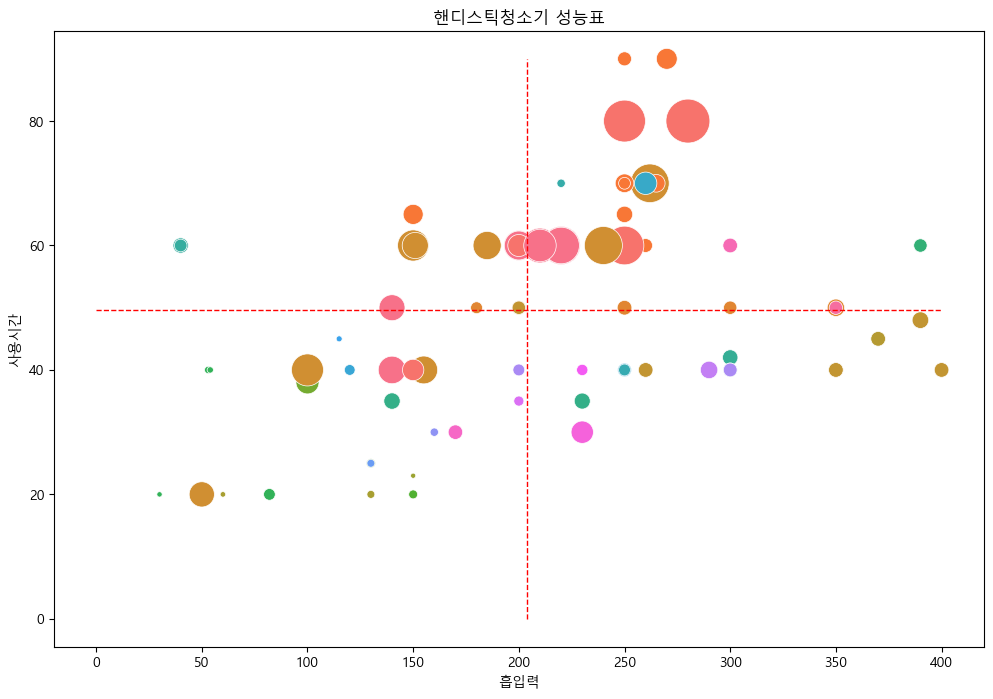

In [20]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("핸디스틱청소기 성능표")
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue = chart_data['회사명'],
               data=chart_data, sizes=(10, 1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value], 
         'r--', lw=1)
plt.show()

# 8. 인기 제품의 데이터 시각화

In [21]:
codition_data[:10]

,카테고리,회사명,제품,가격,사용시간,흡입력
7,핸디스틱청소기,샤오미,드리미 V11,183710,90.0,250.0
16,핸디스틱청소기,아이닉,NEW i20,169000,50.0,300.0
21,핸디스틱청소기,아이닉,i30 아이타워,269000,50.0,350.0
29,핸디스틱청소기,샤오미,드리미 V10,156860,60.0,220.0
44,핸디스틱청소기,샤오미,드리미 T20,305970,70.0,250.0
76,핸디스틱청소기,샤오미,드리미 V12,375967,90.0,270.0
93,핸디스틱청소기,행커,400W,170100,60.0,390.0
102,핸디스틱청소기,DIBEA,올인원 UV,169000,50.0,250.0
105,핸디스틱청소기,샤오미,SHUNZAO Z11 MAX,179050,60.0,260.0
114,핸디스틱청소기,델로라,V11 파워 300W,81890,70.0,220.0


In [22]:
# 흡입력, 사용시간의 최댓값과 최소값 정리
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_min_value = chart_data['사용시간'].min()

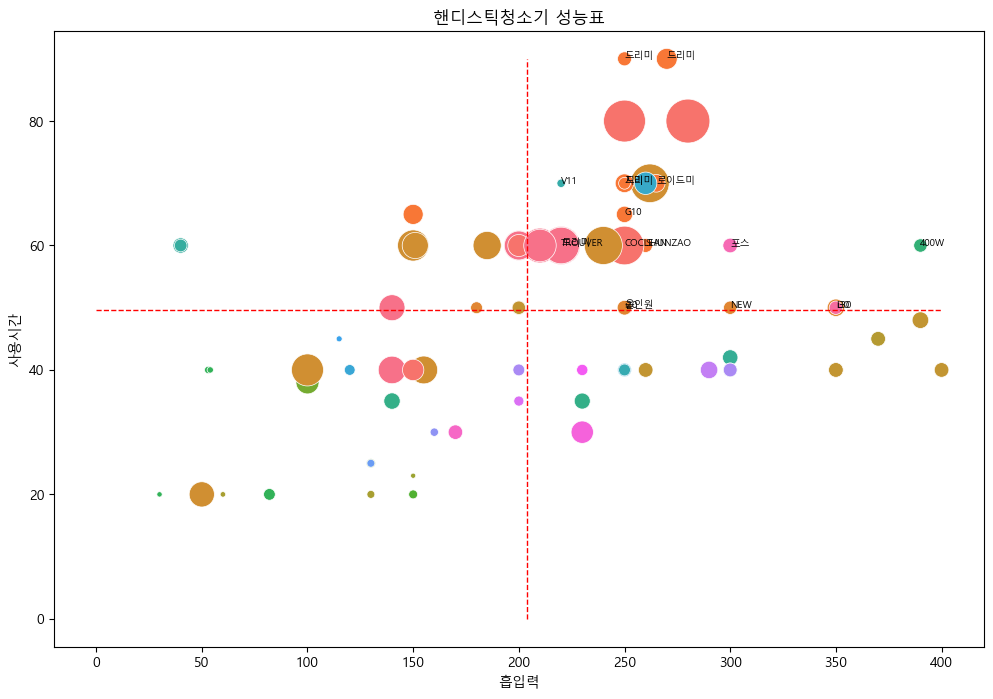

In [26]:
# 청소기 성능 시각화
plt.figure(figsize=(12,8))
plt.title("핸디스틱청소기 성능표")
sns.scatterplot(x='흡입력', y='사용시간', size='가격', hue = chart_data['회사명'],
               data=chart_data, sizes=(10, 1000), legend=False)
plt.plot([0, suction_max_value], [use_time_mean_value, use_time_mean_value],
        'r--', lw=1)
plt.plot([suction_mean_value, suction_mean_value], [0, use_time_max_value], 
         'r--', lw=1)
for index, row in codition_data.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=7)
plt.show()